In [1]:
import pandas as pd
import glob
import re
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Code given and modified

In [2]:
data_annotation = pd.DataFrame(columns = ['Sample_id', 'Cns_subregion', 'Sample_group', 'Subject_id']) # initialisation of the dataframe
xtree = et.parse('./Data/GSE124439_family.xml') # create a variable containing the xml in a tree shape
xroot = xtree.getroot() # get the root of the tree to start the exploration of the tree/xml
# for each element named "sample" that can be found from the root
for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
    temp_sample_id = child.attrib['iid'] # the attribut of this node contains the sample id ()
    # for each element named "Characteristics" that can be found from the current sample
    for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
        if(child2.attrib["tag"] == "cns subregion"):
            temp_cns_subregion = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "sample group"):
            temp_sample_group = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "subject id"):
            temp_subject_id = child2.text.replace('\n', '')
    temp_df = pd.DataFrame({'Sample_id': [temp_sample_id.strip()], 'Cns_subregion': [temp_cns_subregion.strip()], 'Sample_group': [temp_sample_group.strip()], 'Subject_id': [temp_subject_id.strip()]})
    data_annotation = pd.concat([data_annotation, temp_df])

In [3]:
data_annotation

,Sample_id,Cns_subregion,Sample_group,Subject_id
0,GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6
0,GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP
0,GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ
0,GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2
0,GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND
...,...,...,...,...
0,GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4
0,GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL
0,GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW
0,GSM3533404,Frontal Cortex,ALS Spectrum MND,NEUUF289NRL


In [4]:
data_annotation['Cns_subregion'].unique()

array(['Frontal Cortex', 'Motor Cortex (Medial)',
       'Motor Cortex (Lateral)', 'Motor Cortex'], dtype=object)

In [5]:
data_annotation['Sample_group'].unique()

array(['ALS Spectrum MND', 'Non-Neurological Control',
       'Other Neurological Disorders'], dtype=object)

In [6]:
len(data_annotation['Subject_id'].unique())

95

Code given :

In [7]:
import pandas as pd
import glob
import re

path = "./Data" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list

In [8]:
pdList

[                        GSM3533314
 A1BG                            14
 A1BG-AS1                        41
 A1CF                             0
 A2M                           2185
 A2M-AS1                        105
 ...                            ...
 X8_LINE:CR1:LINE               527
 X9_LINE:L1:LINE                145
 Zaphod2:hAT-Tip100:DNA         446
 Zaphod3:hAT-Tip100:DNA        1522
 Zaphod:hAT-Tip100:DNA         1757
 
 [28953 rows x 1 columns],
                         GSM3533339
 A1BG                            39
 A1BG-AS1                        95
 A1CF                             0
 A2M                           1223
 A2M-AS1                         74
 ...                            ...
 X8_LINE:CR1:LINE               354
 X9_LINE:L1:LINE                 83
 Zaphod2:hAT-Tip100:DNA         300
 Zaphod3:hAT-Tip100:DNA        1145
 Zaphod:hAT-Tip100:DNA         1390
 
 [28953 rows x 1 columns],
                         GSM3533344
 A1BG                            17
 A1BG-

In [9]:
data_matrix = pd.concat(pdList, axis=1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

In [10]:
data_matrix

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533344,17,43,4,900,73,113,1,2,6,1,...,727,1561,1372,702,83,350,99,351,1256,1479
GSM3533277,37,95,0,2847,98,164,8,6,22,0,...,873,1785,1823,887,112,545,117,377,1569,1769
GSM3533269,44,105,1,2222,63,74,9,2,17,0,...,482,1060,1073,532,69,246,52,242,948,1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533235,15,39,0,957,74,48,1,2,21,0,...,446,1066,1022,635,63,267,65,256,866,977
GSM3533285,37,136,0,2595,88,162,0,1,26,0,...,1032,2523,2216,1399,131,717,183,605,2275,2280
GSM3533392,42,175,0,2684,83,105,2,3,15,0,...,705,1548,1299,733,61,441,123,372,1310,1437
GSM3533390,30,85,0,1670,78,245,3,0,34,0,...,712,1641,1515,868,70,410,106,318,1286,1436


In [11]:
list_genes = list(data_matrix.columns.values)
list_genes

['A1BG',
 'A1BG-AS1',
 'A1CF',
 'A2M',
 'A2M-AS1',
 'A2ML1',
 'A2MP1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AA06',
 'AAAS',
 'AACS',
 'AACSP1',
 'AADAC',
 'AADACL2',
 'AADACL2-AS1',
 'AADACL3',
 'AADACL4',
 'AADACP1',
 'AADAT',
 'AAED1',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATBC',
 'AATF',
 'AATK',
 'ABALON',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA11P',
 'ABCA12',
 'ABCA13',
 'ABCA17P',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCA9-AS1',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC13',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC5-AS1',
 'ABCC6',
 'ABCC6P1',
 'ABCC6P2',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD11-AS

Merging the dataframe

In [12]:
data_frame_merged = data_annotation.merge(data_matrix, right_index=True, left_on="Sample_id")

In [13]:
data_frame_merged

,Sample_id,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6,42,149,0,3327,101,78,...,986,2218,2096,1120,84,556,134,570,2045,2446
0,GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP,25,107,2,1787,153,109,...,1216,2373,2001,1144,118,582,153,552,2057,2279
0,GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ,20,95,0,1830,121,127,...,905,2018,1815,1011,84,571,126,479,1659,1778
0,GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2,22,101,0,2131,142,143,...,935,2278,2032,1198,97,562,132,540,2032,2135
0,GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND,22,102,0,1706,83,178,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4,23,113,0,2130,72,71,...,553,1243,1089,658,72,320,73,311,1102,1169
0,GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL,134,300,0,6077,171,42,...,719,1988,1691,966,119,460,109,399,1619,1724
0,GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW,64,290,0,4752,118,174,...,623,1466,1246,726,61,358,107,347,1284,1469
0,GSM3533404,Frontal Cortex,ALS Spectrum MND,NEUUF289NRL,124,332,0,3516,141,173,...,743,1846,1680,936,110,479,120,503,1646,1839


In [14]:
data_frame_merged

,Sample_id,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6,42,149,0,3327,101,78,...,986,2218,2096,1120,84,556,134,570,2045,2446
0,GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP,25,107,2,1787,153,109,...,1216,2373,2001,1144,118,582,153,552,2057,2279
0,GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ,20,95,0,1830,121,127,...,905,2018,1815,1011,84,571,126,479,1659,1778
0,GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2,22,101,0,2131,142,143,...,935,2278,2032,1198,97,562,132,540,2032,2135
0,GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND,22,102,0,1706,83,178,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4,23,113,0,2130,72,71,...,553,1243,1089,658,72,320,73,311,1102,1169
0,GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL,134,300,0,6077,171,42,...,719,1988,1691,966,119,460,109,399,1619,1724
0,GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW,64,290,0,4752,118,174,...,623,1466,1246,726,61,358,107,347,1284,1469
0,GSM3533404,Frontal Cortex,ALS Spectrum MND,NEUUF289NRL,124,332,0,3516,141,173,...,743,1846,1680,936,110,479,120,503,1646,1839


In [15]:
data_frame_merged = data_frame_merged.set_index('Sample_id')


In [24]:
class ALS_RNAseq:
    def __init__(self):
        self.__data_matrix = data_frame_merged

    def get_data_matrix(self):
        return self.__data_matrix
    
    def get_data_genes(self) :
        return self.get_data_matrix()[list_genes]
    
    def get_data_subregion_genes(self) :
        list_features = ['Cns_subregion']
        list_features.extend(list_genes)
        return self.get_data_matrix()[list_features]
        
    def __str__(self):
        return "Data Frame of RNA seq samples"

In [25]:
c_data = ALS_RNAseq()

In [26]:
c_data.get_data_subregion_genes()

,Cns_subregion,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,42,149,0,3327,101,78,4,0,67,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,25,107,2,1787,153,109,2,1,25,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,20,95,0,1830,121,127,1,1,11,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,22,101,0,2131,142,143,5,1,36,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,22,102,0,1706,83,178,1,3,31,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,23,113,0,2130,72,71,2,3,21,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,134,300,0,6077,171,42,8,5,225,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,64,290,0,4752,118,174,8,2,135,...,623,1466,1246,726,61,358,107,347,1284,1469


In [27]:
c_data.get_data_matrix()

,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6,42,149,0,3327,101,78,4,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP,25,107,2,1787,153,109,2,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ,20,95,0,1830,121,127,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2,22,101,0,2131,142,143,5,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND,22,102,0,1706,83,178,1,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4,23,113,0,2130,72,71,2,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL,134,300,0,6077,171,42,8,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW,64,290,0,4752,118,174,8,...,623,1466,1246,726,61,358,107,347,1284,1469


In [28]:
c_data.get_data_genes()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,23,113,0,2130,72,71,2,3,21,0,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,134,300,0,6077,171,42,8,5,225,0,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,64,290,0,4752,118,174,8,2,135,0,...,623,1466,1246,726,61,358,107,347,1284,1469


In [29]:
data_by_diseasegrp = c_data.get_data_matrix()['Sample_group'].value_counts()
data_by_diseasegrp

Sample_group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [30]:
data_by_diseasegrp.describe()

count      3.000000
mean      58.666667
std       74.781905
min       14.000000
25%       15.500000
50%       17.000000
75%       81.000000
max      145.000000
Name: count, dtype: float64

In [53]:
data_by_genes_stats = c_data.get_data_genes().mean()
data_by_genes_stats

A1BG                        38.062500
A1BG-AS1                   118.568182
A1CF                         0.170455
A2M                       2455.403409
A2M-AS1                    102.568182
                             ...     
X8_LINE:CR1:LINE           462.647727
X9_LINE:L1:LINE            110.863636
Zaphod2:hAT-Tip100:DNA     415.931818
Zaphod3:hAT-Tip100:DNA    1555.630682
Zaphod:hAT-Tip100:DNA     1735.556818
Length: 28953, dtype: float64

In [32]:
data_by_genes_stats.describe() # mean of the genes

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,38.062500,118.568182,0.170455,2455.403409,102.568182,131.272727,2.670455,2.573864,45.119318,0.488636,...,806.892045,1773.965909,1643.812500,901.12500,89.926136,462.647727,110.863636,415.931818,1555.630682,1735.556818
std,20.511225,48.137849,0.662835,1278.351971,35.553998,69.401396,2.448190,2.420200,36.418245,0.770815,...,231.178632,487.710159,435.815209,241.33388,27.999392,129.147228,33.597511,122.379157,462.496696,490.915096
min,10.000000,39.000000,0.000000,439.000000,31.000000,9.000000,0.000000,0.000000,2.000000,0.000000,...,288.000000,640.000000,644.000000,352.00000,30.000000,179.000000,36.000000,136.000000,614.000000,723.000000
25%,24.000000,91.750000,0.000000,1474.500000,79.000000,83.750000,1.000000,1.000000,20.000000,0.000000,...,650.500000,1466.000000,1339.750000,725.50000,71.000000,380.000000,88.000000,328.000000,1247.000000,1418.750000
50%,34.000000,108.500000,0.000000,2286.500000,94.500000,122.000000,2.000000,2.000000,34.500000,0.000000,...,808.000000,1750.000000,1626.000000,869.50000,88.000000,448.000000,107.000000,409.500000,1562.500000,1733.000000
75%,43.250000,140.250000,0.000000,3101.750000,119.500000,162.000000,4.000000,3.250000,60.000000,1.000000,...,918.500000,2018.500000,1868.500000,1034.75000,103.000000,529.500000,131.250000,479.500000,1786.250000,1979.250000
max,134.000000,341.000000,6.000000,7137.000000,227.000000,496.000000,20.000000,14.000000,225.000000,5.000000,...,1824.000000,4240.000000,3761.000000,2046.00000,235.000000,1180.000000,255.000000,954.000000,3946.000000,3902.000000


In [33]:
data_wo_sample_index = c_data.get_data_matrix().reset_index()
data_by_subregion = data_wo_sample_index.groupby(['Cns_subregion']).count()['Sample_id']
data_by_subregion # Number of samples per region

Cns_subregion
Frontal Cortex            81
Motor Cortex               5
Motor Cortex (Lateral)    45
Motor Cortex (Medial)     45
Name: Sample_id, dtype: int64

In [34]:
data_by_subregion.describe()

count     4.000000
mean     44.000000
std      31.048349
min       5.000000
25%      35.000000
50%      45.000000
75%      54.000000
max      81.000000
Name: Sample_id, dtype: float64

In [35]:
data_wo_sample_index = c_data.get_data_matrix().reset_index()
data_by_subjectid = data_wo_sample_index.groupby(['Subject_id']).count()['Sample_id']
data_by_subjectid # Number of samples per subject (human)

Subject_id
GWF14-01     3
JHU 38       1
JHU 73       3
JHU 74       3
JHU 75       1
            ..
PF-UCL-31    1
PF-UCL-46    1
PF-UCL-6     1
PF-UCL-8     1
PF-UCL-9     1
Name: Sample_id, Length: 95, dtype: int64

In [36]:
data_by_subjectid.describe()

count    95.000000
mean      1.852632
std       0.898799
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Sample_id, dtype: float64

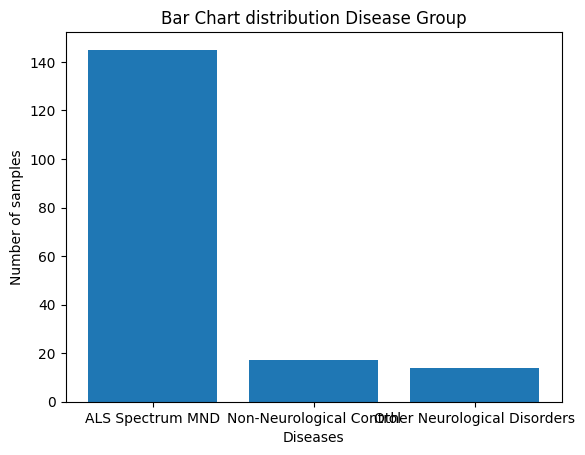

In [37]:
# Bar charts for Disease Group

plt.bar(data_by_diseasegrp.index, data_by_diseasegrp.values)

# Add titles and labels
plt.title('Bar Chart distribution Disease Group')
plt.xlabel('Diseases')
plt.ylabel('Number of samples')

# Show the chart
plt.show()

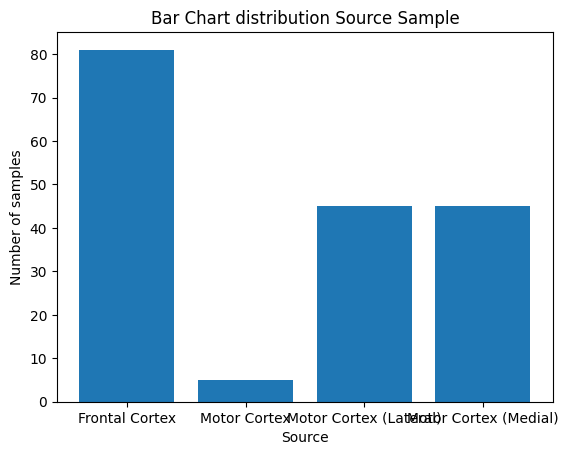

In [38]:
# Bar charts for Sources
plt.bar(data_by_subregion.index, data_by_subregion.values)

# Add titles and labels
plt.title('Bar Chart distribution Source Sample')
plt.xlabel('Source')
plt.ylabel('Number of samples')

# Show the chart
plt.show()

Histogramms for stats on the genes

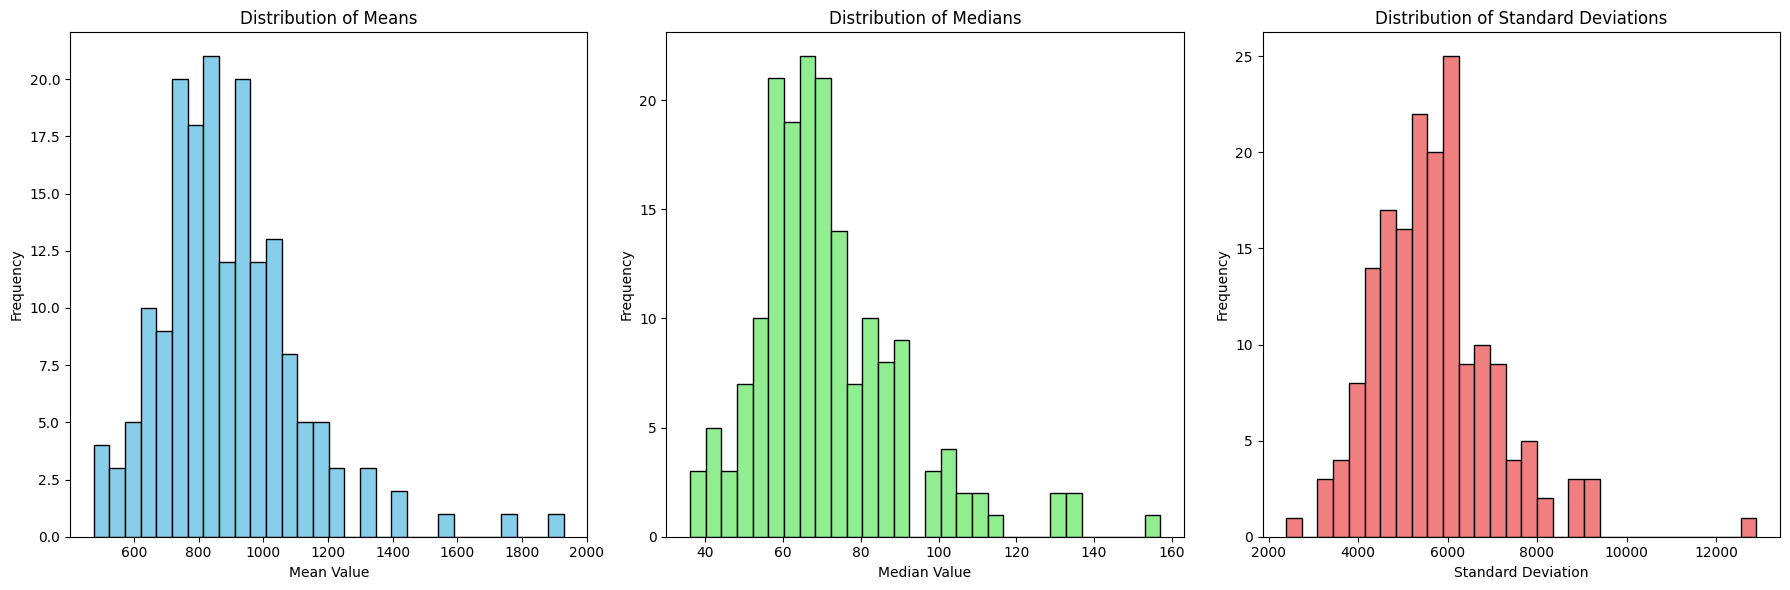

In [39]:
data = c_data.get_data_genes()


means = np.mean(data.values, axis=1)
medians = np.median(data.values, axis=1)
std_devs = np.std(data.values, axis=1)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histo means
axs[0].hist(means, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Means')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Frequency')

# Histo for medians
axs[1].hist(medians, bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Medians')
axs[1].set_xlabel('Median Value')
axs[1].set_ylabel('Frequency')

# Histo for std deviation
axs[2].hist(std_devs, bins=30, color='lightcoral', edgecolor='black')
axs[2].set_title('Distribution of Standard Deviations')
axs[2].set_xlabel('Standard Deviation')
axs[2].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
c_data.get_data_genes()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,42,149,0,3327,101,78,4,0,67,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,25,107,2,1787,153,109,2,1,25,0,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,20,95,0,1830,121,127,1,1,11,0,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,22,101,0,2131,142,143,5,1,36,0,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,22,102,0,1706,83,178,1,3,31,0,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,23,113,0,2130,72,71,2,3,21,0,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,134,300,0,6077,171,42,8,5,225,0,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,64,290,0,4752,118,174,8,2,135,0,...,623,1466,1246,726,61,358,107,347,1284,1469


In [41]:
means = c_data.get_data_genes().mean(axis=1)
medians = c_data.get_data_genes().median(axis=1)
std_devs = c_data.get_data_genes().std(axis = 1)

sample_ids = c_data.get_data_genes().index

data = {
    'Mean': means,
    'Median':medians,
    'Std_dev': std_devs,
}

sample_stats = pd.DataFrame(data)
sample_stats


,Mean,Median,Std_dev
Sample_id,,,
GSM3533230,1041.382378,92.0,7144.948717
GSM3533231,881.608503,65.0,6556.784539
GSM3533232,802.592132,58.0,5618.694081
GSM3533233,785.868615,65.0,6617.736421
GSM3533234,906.813525,61.0,6815.130467
...,...,...,...
GSM3533401,621.179187,51.0,3875.932581
GSM3533402,1412.596518,136.0,7679.231478
GSM3533403,1142.241288,101.0,5264.705168


In [42]:
sample_stats[sample_stats['Std_dev']==max(sample_stats['Std_dev'].values)]

,Mean,Median,Std_dev
Sample_id,,,
GSM3533364,1929.230132,157.0,12904.004636


In [43]:
c_data.get_data_matrix().loc['GSM3533364']

Cns_subregion             Motor Cortex (Medial)
Sample_group                   ALS Spectrum MND
Subject_id                               JHU 83
A1BG                                         58
A1BG-AS1                                    228
                                  ...          
X8_LINE:CR1:LINE                           1180
X9_LINE:L1:LINE                             255
Zaphod2:hAT-Tip100:DNA                      954
Zaphod3:hAT-Tip100:DNA                     3946
Zaphod:hAT-Tip100:DNA                      3902
Name: GSM3533364, Length: 28956, dtype: object

In [44]:
c_data.get_data_genes().loc['GSM3533364'].idxmax(), c_data.get_data_genes().loc['GSM3533364'].max()

('MIRb:MIR:SINE', 884080)

In [45]:
c_data.get_data_genes()['MIRb:MIR:SINE'].std()

100627.5532686476

In [46]:
c_data.get_data_genes()['MIRb:MIR:SINE'].mean()

366426.19886363635

In [47]:
s_id = c_data.get_data_matrix().loc['GSM3533364']['Subject_id']
s_id

'JHU 83'

In [48]:
c_data.get_data_matrix()[c_data.get_data_matrix()['Subject_id']==s_id]

,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533363,Motor Cortex (Lateral),ALS Spectrum MND,JHU 83,19,125,0,2264,85,93,1,...,635,1534,1372,733,98,407,88,396,1369,1486
GSM3533364,Motor Cortex (Medial),ALS Spectrum MND,JHU 83,58,228,0,3953,227,260,4,...,1824,4240,3761,2046,235,1180,255,954,3946,3902
GSM3533365,Motor Cortex (Lateral),ALS Spectrum MND,JHU 83,32,91,0,2537,87,84,2,...,637,1505,1384,724,90,358,65,348,1408,1409


In [49]:
outlier_ids = c_data.get_data_matrix()[c_data.get_data_matrix()['Subject_id']==s_id].index.values.tolist()

In [50]:
for id in outlier_ids:
    print("id sample:",id,"mean:",c_data.get_data_genes().loc[id].mean(), "median:",c_data.get_data_genes().loc[id].median(), "std:",c_data.get_data_genes().loc[id].std())

id sample: GSM3533363 mean: 736.4009601768383 median: 60.0 std: 4855.3268535997095
id sample: GSM3533364 mean: 1929.230131592581 median: 157.0 std: 12904.004635996334
id sample: GSM3533365 mean: 754.6600006907747 median: 65.0 std: 4815.672408576015


In [52]:
data = c_data.get_data_subregion_genes().groupby(['Cns_subregion']).mean()
data
g = sns.FacetGrid(data, col="time")

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Cns_subregion,,,,,,,,,,,,,,,,,,,,,
Frontal Cortex,36.098765,128.185185,0.148148,2276.283951,93.172840,129.962963,2.222222,2.888889,52.098765,0.506173,...,755.753086,1692.580247,1556.246914,858.259259,82.135802,449.888889,105.358025,403.913580,1506.629630,1676.283951
Motor Cortex,37.000000,117.400000,0.200000,2206.400000,92.000000,101.600000,3.000000,2.800000,41.000000,0.400000,...,730.800000,1581.600000,1453.200000,791.800000,89.400000,392.800000,93.800000,382.200000,1404.000000,1602.400000
Motor Cortex (Lateral),42.311111,113.111111,0.266667,2653.666667,114.888889,136.044444,2.822222,2.644444,36.511111,0.511111,...,873.888889,1889.533333,1765.577778,952.444444,99.244444,484.622222,114.755556,426.355556,1635.222222,1825.066667
Motor Cortex (Medial),37.466667,106.844444,0.111111,2607.222222,108.333333,132.155556,3.288889,1.911111,41.622222,0.444444,...,840.400000,1826.266667,1700.844444,939.111111,94.688889,471.400000,118.777778,430.888889,1581.088889,1767.533333


In [32]:
data_by_diseasegrp

Sample_group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [33]:
c_data.get_data_matrix()

,Cns_subregion,Sample_group,Subject_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
Sample_id,,,,,,,,,,,,,,,,,,,,,
GSM3533230,Frontal Cortex,ALS Spectrum MND,NEUEL133AK6,42,149,0,3327,101,78,4,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,NEUYV496XLP,25,107,2,1787,153,109,2,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,NEUZU200WEQ,20,95,0,1830,121,127,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,NEUME287RK2,22,101,0,2131,142,143,5,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,NEUEC006FND,22,102,0,1706,83,178,1,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,NEUMY028JH4,23,113,0,2130,72,71,2,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,NEUXR145UBL,134,300,0,6077,171,42,8,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,NEUKN209FNW,64,290,0,4752,118,174,8,...,623,1466,1246,726,61,358,107,347,1284,1469


In [34]:
len(list_genes)
len(c_data.get_data_matrix().columns)

28956

In [ ]:
# # Step 2: Create box plots
# plt.figure(figsize=(14, 7))
# df = c_data.get_data_matrix()



# df_melted = pd.melt(df, id_vars=["Sample_group"], 
#                     value_vars=list_genes, 
#                     var_name="Gene", value_name="Gene_Expression")

# # Step 3: Create the box plot for gene expression distribution by sample group
# plt.figure(figsize=(12, 6))
# sns.boxplot(x="Sample_group", y="Gene_Expression", hue="Gene", data=df_melted, palette="Set3")
# plt.title('Gene Expression Distribution by Sample Group')
# plt.xlabel('Sample Group')
# plt.ylabel('Gene Expression Level')
# plt.tight_layout()
# plt.show()

KeyboardInterrupt: 

<Figure size 1400x700 with 0 Axes>